# Plotting the force depending on the cell separation distance

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import force_functions as ff


plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [2]:
s = 1.0  # equilibrium rest length, set to 1 cell diameter
rA = 1.5  # set maximum interaction distance to 1.5 cell diameter
x_vals = np.linspace(0.8, 1.6, 1000)


defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[5], 'GLS': defcolors[6]}

## Cubic force

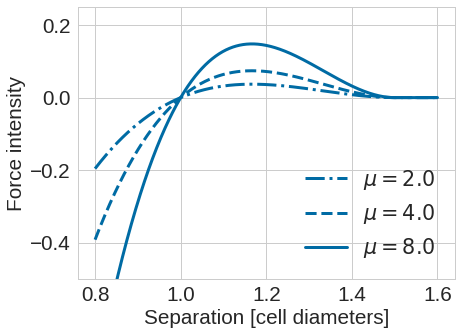

In [3]:
# plot cubic force law for different mu values


plt.plot(x_vals, ff.cubic(x_vals, **{"mu": 2.0, "s": s, "rA": rA}), color=colors['cubic'], linestyle='-.', label='$\mu=2.0$')
plt.plot(x_vals, ff.cubic(x_vals, **{"mu": 4.0, "s": s, "rA": rA}), color=colors['cubic'], linestyle='--', label='$\mu=4.0$')
plt.plot(x_vals, ff.cubic(x_vals, **{"mu": 8.0, "s": s, "rA": rA}), color=colors['cubic'], linestyle='-',  label='$\mu=8.0$')
plt.legend()
plt.ylim([-0.5, 0.25])

plt.xlabel('Separation [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('cubic_force.pdf', bbox_inches='tight')
plt.savefig('cubic_force.eps', bbox_inches='tight')

## Piecewise quadratic

In [4]:
n = 1
p = 1
polynomial_repulsion = lambda mu, n, r: np.where(r <= rR,
                                                 -mu*(1-r/rR)**(n+1), 0.)
polynomial_adhesion = lambda mu, n, r: np.where(r <= rA,
                                                mu*(1-r/rA)**(n+1), 0.)

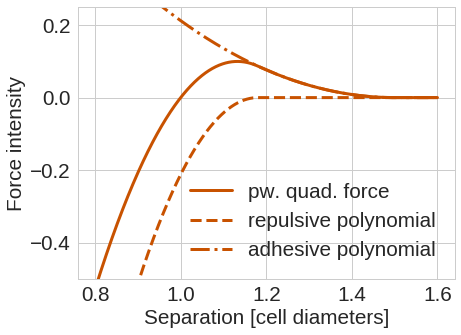

In [5]:
muR = 9.1
ratio = 0.21
muA = ratio*muR
rR = 1.0/(1.0-np.sqrt(ratio)/3.0)
plt.plot(x_vals, ff.piecewise_polynomial(x_vals, **{"muA": muA, "muR": muR, "rA": rA, "rR": rR}), label='pw. quad. force', color=colors['pw. quad.'])
plt.plot(x_vals, polynomial_repulsion(muR, n, x_vals), linestyle='--', label='repulsive polynomial', color=colors['pw. quad.'])
plt.plot(x_vals, polynomial_adhesion(muA, n, x_vals), linestyle='-.', label='adhesive polynomial', color=colors['pw. quad.'])
plt.ylim([-0.5, 0.25])
plt.legend()
plt.xlabel('Separation [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('pwq_parts.pdf', bbox_inches='tight')
plt.savefig('pwq_parts.eps', bbox_inches='tight')

### Fixed ratio, different muR values

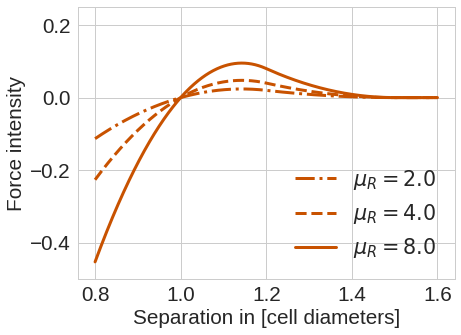

In [6]:
muR_vals = [2.0, 4.0, 8.0]
ratio = 0.25
linestyles=('-','--','-.',':')

for i, muR in enumerate(muR_vals):
    muA = ratio*muR
    rR = 1.0/(1.0-np.sqrt(ratio)/3.0)
    plt.plot(x_vals,
         ff.piecewise_polynomial(x_vals, **{"muA": muA, "muR": muR,
                                  "rA": rA, "rR": rR}), linestyle=linestyles[2-i], color=colors['pw. quad.'],
         label='$\mu_R = '+str(muR)+'$')
plt.legend(loc='lower right')
plt.ylim([-0.5, 0.25])
plt.xlabel('Separation in [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('pwq_mu.pdf', bbox_inches='tight')  
plt.savefig('pwq_mu.eps', bbox_inches='tight')  

### Fixed mu, different ratio values

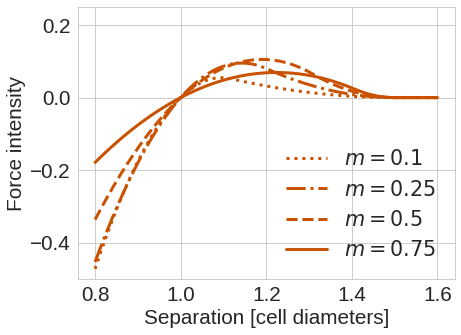

In [7]:
muR = 8.0
ratio_vals = [0.10, 0.25, 0.5, 0.75]
linestyles=('-','--','-.',':')


for i, ratio in enumerate(ratio_vals):
    muA = ratio*muR
    rR = 1.0/(1.0-np.sqrt(ratio)/3.0)
    plt.plot(x_vals, ff.piecewise_polynomial(x_vals, **{"muA": muA, "muR": muR, "rA": rA, "rR": rR}), linestyle=linestyles[3-i], color=colors['pw. quad.'], label='$m='+str(ratio)+'$')
plt.legend()
plt.ylim([-0.5, 0.25])
plt.xlabel('Separation [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('pwq_ratio.pdf', bbox_inches='tight')
plt.savefig('pwq_ratio.eps', bbox_inches='tight')

## GLS force

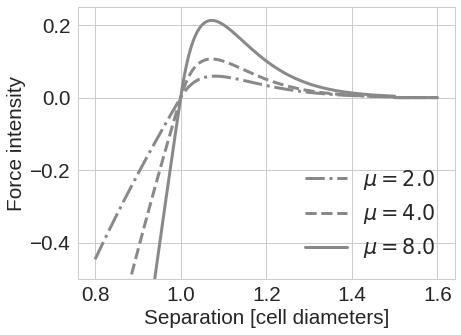

In [8]:
#plt.plot(x_vals, ff.gls(x_vals, **{'mu': 1.0 ,'s': 1.0, 'rA': 1.5, 'a': 5}), color=colors['GLS'], linestyle='-.')
plt.plot(x_vals, ff.gls(x_vals, **{'mu': 2.0 ,'s': 1.0, 'rA': 1.5, 'a': -2*np.log(0.002/1.0)}), color=colors['GLS'], linestyle='-.', label='$\mu=2.0$')
plt.plot(x_vals, ff.gls(x_vals, **{'mu': 4.0 ,'s': 1.0, 'rA': 1.5, 'a': -2*np.log(0.002/2.0)}), color=colors['GLS'], linestyle='--',label='$\mu=4.0$')
plt.plot(x_vals, ff.gls(x_vals, **{'mu': 8.0 ,'s': 1.0, 'rA': 1.5, 'a': -2*np.log(0.002/2.0)}), color=colors['GLS'], linestyle='-',label='$\mu=8.0$')
plt.legend()
plt.ylim([-0.5, 0.25])
plt.xlabel('Separation [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('GLS_force_mu.pdf', bbox_inches='tight')
plt.savefig('GLS_force_mu.eps', bbox_inches='tight')

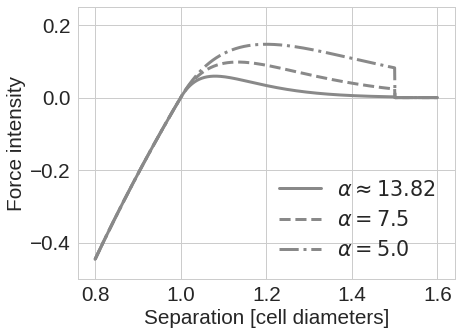

In [9]:
#plt.plot(x_vals, ff.gls(x_vals, **{'mu': 1.0 ,'s': 1.0, 'rA': 1.5, 'a': 5}), color=colors['GLS'], linestyle='-.')
mu = 2.0
plt.plot(x_vals, ff.gls(x_vals, **{'mu': mu ,'s': 1.0, 'rA': 1.5, 'a': -2*np.log(0.002/1.0)}), color=colors['GLS'], label='$ \\alpha\\approx'+str(round(-2*np.log(0.002/mu),2)) +'$')
plt.plot(x_vals, ff.gls(x_vals, **{'mu': mu ,'s': 1.0, 'rA': 1.5, 'a': 7.5}), color=colors['GLS'], linestyle='--', label='$\\alpha=7.5$')
plt.plot(x_vals, ff.gls(x_vals, **{'mu': mu ,'s': 1.0, 'rA': 1.5, 'a': 5}), color=colors['GLS'], linestyle='-.', label='$\\alpha=5.0$')
plt.legend(loc='lower right')
plt.ylim([-0.5, 0.25])

plt.xlabel('Separation [cell diameters]')
plt.ylabel('Force intensity')
plt.savefig('GLS_force_alpha.pdf', bbox_inches='tight')
plt.savefig('GLS_force_alpha.eps', bbox_inches='tight')